In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import pandas as pd

### [Julia sets](https://en.wikipedia.org/wiki/Julia_set) & [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

Both of them have the backbone itrative rational function $ f_c^t(z) := \{ z_{t+1} = z_t^2 + c\ | t=0, z\ \&\ c \in  \mathbb{C} \} $ that divides the complex plane into 2 sets.

One set where all points stay near the origin under this function, i.e. 	$ \lim_{t \to \infty} |f_c^t(z)| < \infty $, is called the Mandelbrot set iff. $ z_0 = 0 $.  Julia set is the boundary of the converging set, regardless if it's the Mandelbrot set or not. **NOTE that Julia sets are _NOT_ the diverging sets but the _BOUNDARY_!**

other highlights on the values of $ c $ and $ z_0 $ for producing both sets:

| Julia sets | Mandelbrot set |
| :-: | :-: |
| $ c = const$ | $ c \leftrightarrow pixel $ |
| $ z_0 \leftrightarrow pixel $ | $ z_0 = 0 $ |


__[This is a picture showing the effects of adding and multiplying in the complex domain & what I mean by diverge(goes to $ \infty $) and converge(stay near the origin)](https://upload.wikimedia.org/wikipedia/commons/5/5e/Complex_mandelbrot_illustration.png)__, Just for fun, notice how addition has a linear effect on the shift and multiplication has a rotational effect! (multiplication with $ +i $ has the effect of rotation around the origin 90° anticlockwise)
<!-- ![](https://upload.wikimedia.org/wikipedia/commons/5/5e/Complex_mandelbrot_illustration.png) -->

# Psudo code for how to get the Julia sets
    # for x in x_axis:
    #     for y in y_axis:
    #         complex_z = x + 1j * y
    #         for i in iterations:
    #             complex_z = complex_function(complex_z)
    #             if mangnitude(complex_z) > 2:
    #                 picture[x,y] = i
    #                 break
### This would have been okay if it's a C/C++ or Fortrain code BUT this is horrible in Python, we must use vectorization, and so:

In [2]:
# marking the boundary area by a min and a max complex numbers in the 3rd and 1st quadrant
boundary = (-1.5-1.5j, 1.5+1.5j)
# resolution or the count of steps in the X and Y axes
resolution_steps = 1024


# preparing the axes and creating the complex area
x_axis = np.linspace(boundary[0].real, boundary[1].real, resolution_steps)
y_axis = np.linspace(boundary[0].imag, boundary[1].imag, resolution_steps)
X, Y = np.meshgrid(x_axis, y_axis)
Z = X + 1j * Y

#  cleaning up
del x_axis, y_axis, X, Y


In [3]:
def Julia(Z, complex_constant, iterations=100):
    """Returen the Julia set .

    Keyword arguments:
    Z -- the imaginary plane 
    complex_constant -- the constant complex in the equation
    iterations -- number of iterations before the loop stop per pixel (default 100)
    """
    # array to hold the escape iteration index
    J = np.zeros(Z.shape)
    for i in range(iterations):
        # indecies mask for all mangitudes less than or equal to 2
        mask = np.abs(Z) <= 2
        # compute only those values of Z inside the mask
        Z[mask] = Z[mask]**2 + complex_constant
        # assign the escape iteration index
        J[mask] = i
    return J


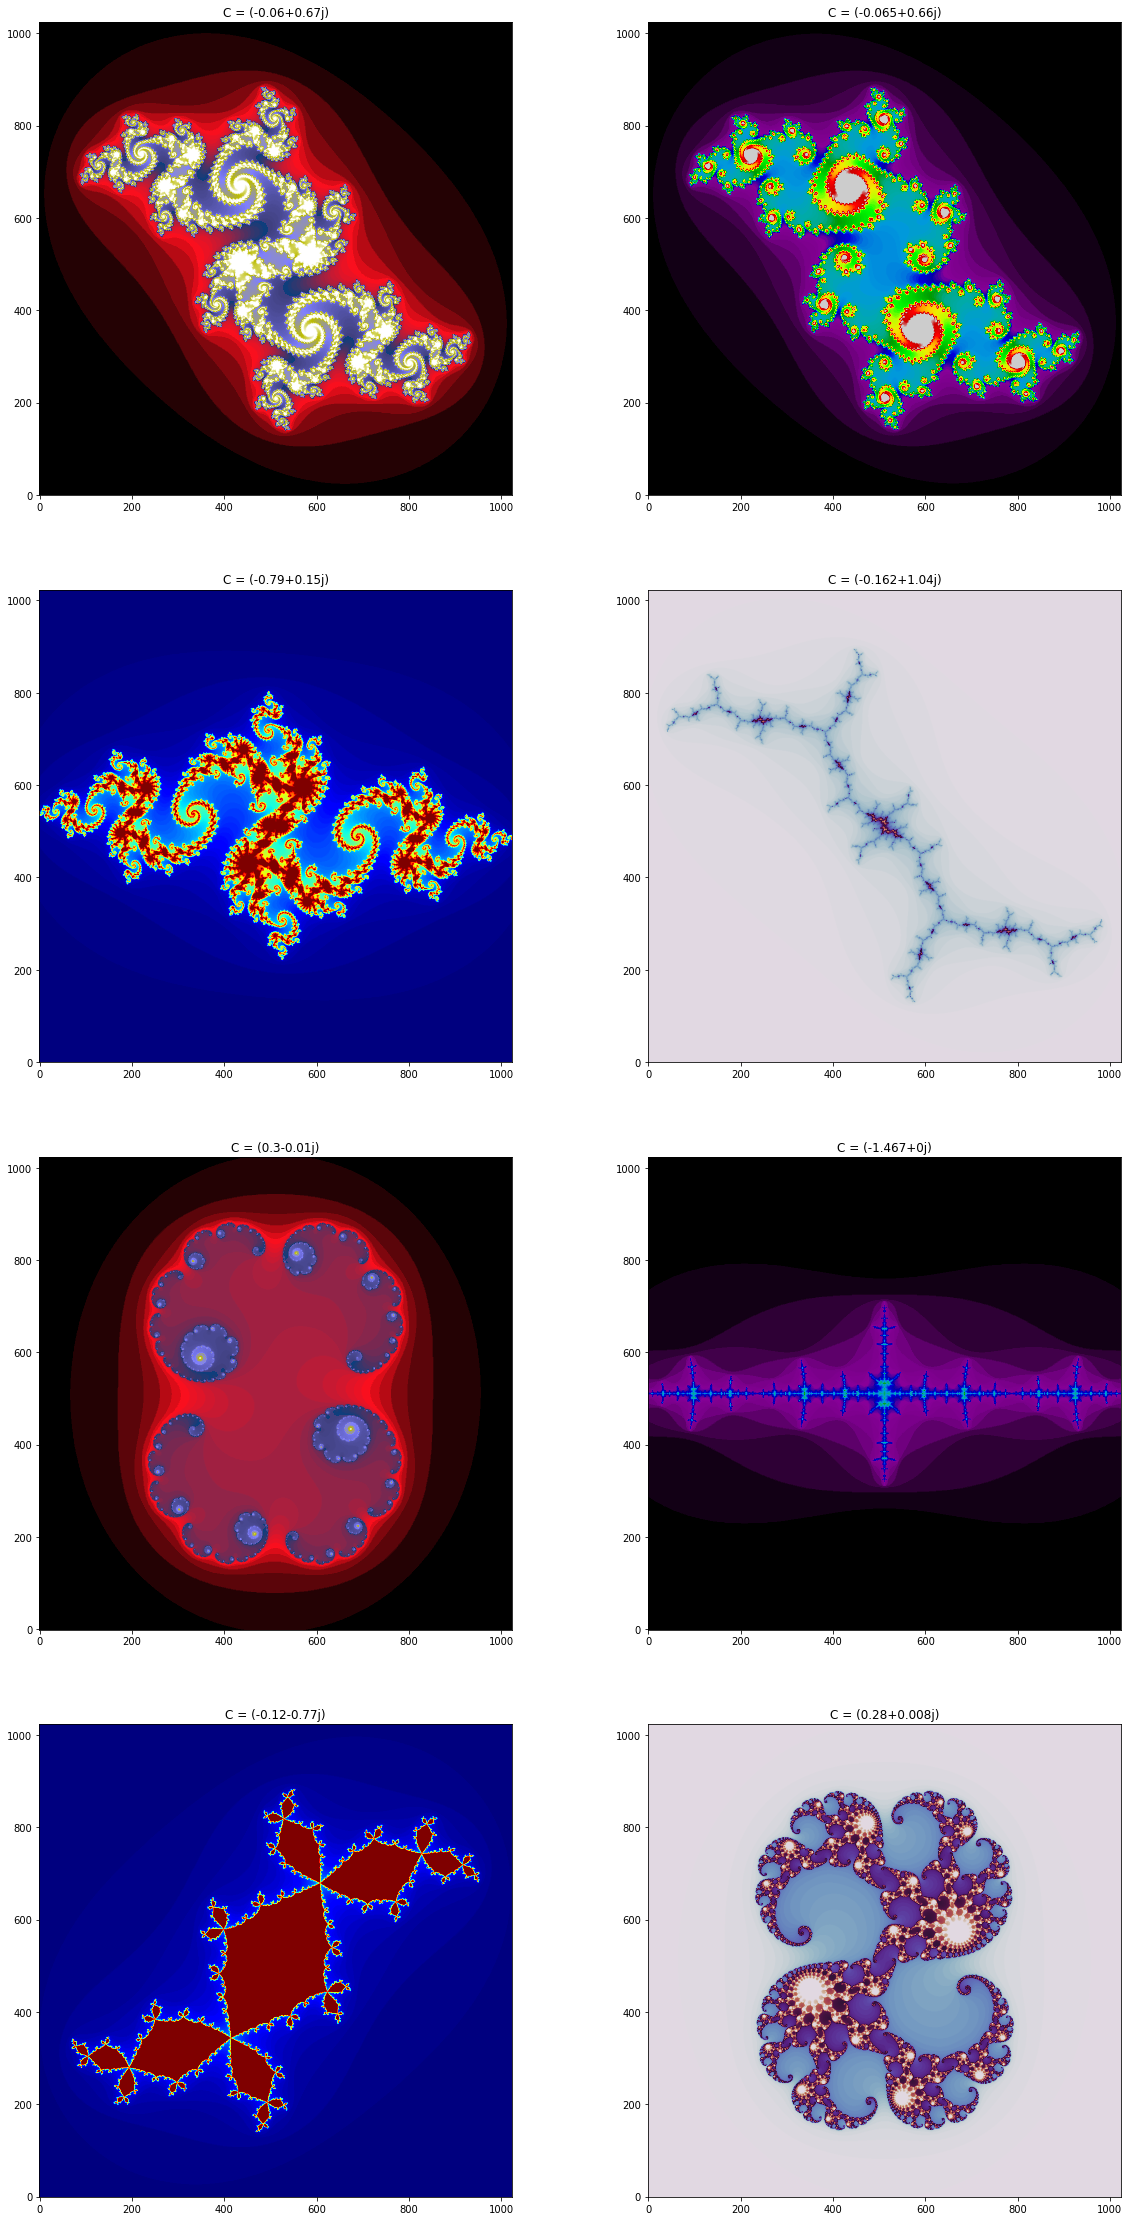

In [4]:
# some constant complex numbers to use
complex_numbers = np.array([-.06+.67j, -.065+.66j, -.79+.15j, -.162 +
                   1.04j, .3-.01j, -1.467, -.12-.77j, .28+.008j])
#  colors that i liked
colors = [cm.gist_stern, cm.nipy_spectral, cm.jet, cm.twilight]

subplot_per_row = 2
#  -(- num1/num2) == ceil(num1/num2)
subplot_per_col = -(- len(complex_numbers) // subplot_per_row)

_, ax = plt.subplots(subplot_per_col, subplot_per_row,
                     figsize=(subplot_per_row*10, subplot_per_col*10))

for i, c in enumerate(complex_numbers):
    JSet = Julia(np.copy(Z), c)
    ax[i//subplot_per_row, i % subplot_per_row].imshow(JSet, cmap=colors[i % len(colors)], origin="lower")
    ax[i//subplot_per_row, i % subplot_per_row].set_title('C = ' + str(c))

plt.show()


### These are some Julia sets generated for different constant $ c $ written above each subplot.

##### Notice the sutle difference between the 1st 2 subplots, merely $ -0.005-0.01j $ displacement made that difference!

and last but not least, let's have a look at the Mandelbrot algorthm and implementation.
again, mostly same algorithm except $ Z_0 = 0 $ and $ c $ is the value of the pixel, but yet again problem, Python is slow and we must use numpy vectorization!

In [5]:
def Mandelbrot(Z, iterations=100):
    """Returen the Mandelbrot set .

    Keyword arguments:
    Z -- the imaginary plane
    iterations -- number of iterations before the loop stop per pixel (default 100)
    """
    # C here is where the pixel is in the complex plane
    C = np.copy(Z)
    # array to hold the escape iteration index
    M = np.zeros(Z.shape)
    for i in range(iterations):
        # indecies mask for all mangitudes less than or equal to 2
        mask = np.abs(Z) <= 2
        # compute only those values of Z & C inside the mask
        Z[mask] = Z[mask]**2 + C[mask]
        # assign the escape iteration index
        M[mask] = i
    return M


So in the code I wrote yet again $ z_{t+1} = z_t^2 + c $ without setting $ z_0 $ back to $ 0 $

and this is still correct because $ z_1^2 = z_0 + c = 0 + c = c $ \
$ z_1 = c $ \
$ z_2 = z_1^2 + c $ \
. \
. \
hence: \
$ z_{t+1} = z_t^2 + c $

In [6]:
# create the Mandelbrot set after shiting the complex area[-1.5-1.5j, 1.5+1.5j] by -1 on the real axis 
# to become [-2.5-1.5j, 0.5+1.5j] to have a better view encompassing the set
Mandel = Mandelbrot(np.copy(Z-1))

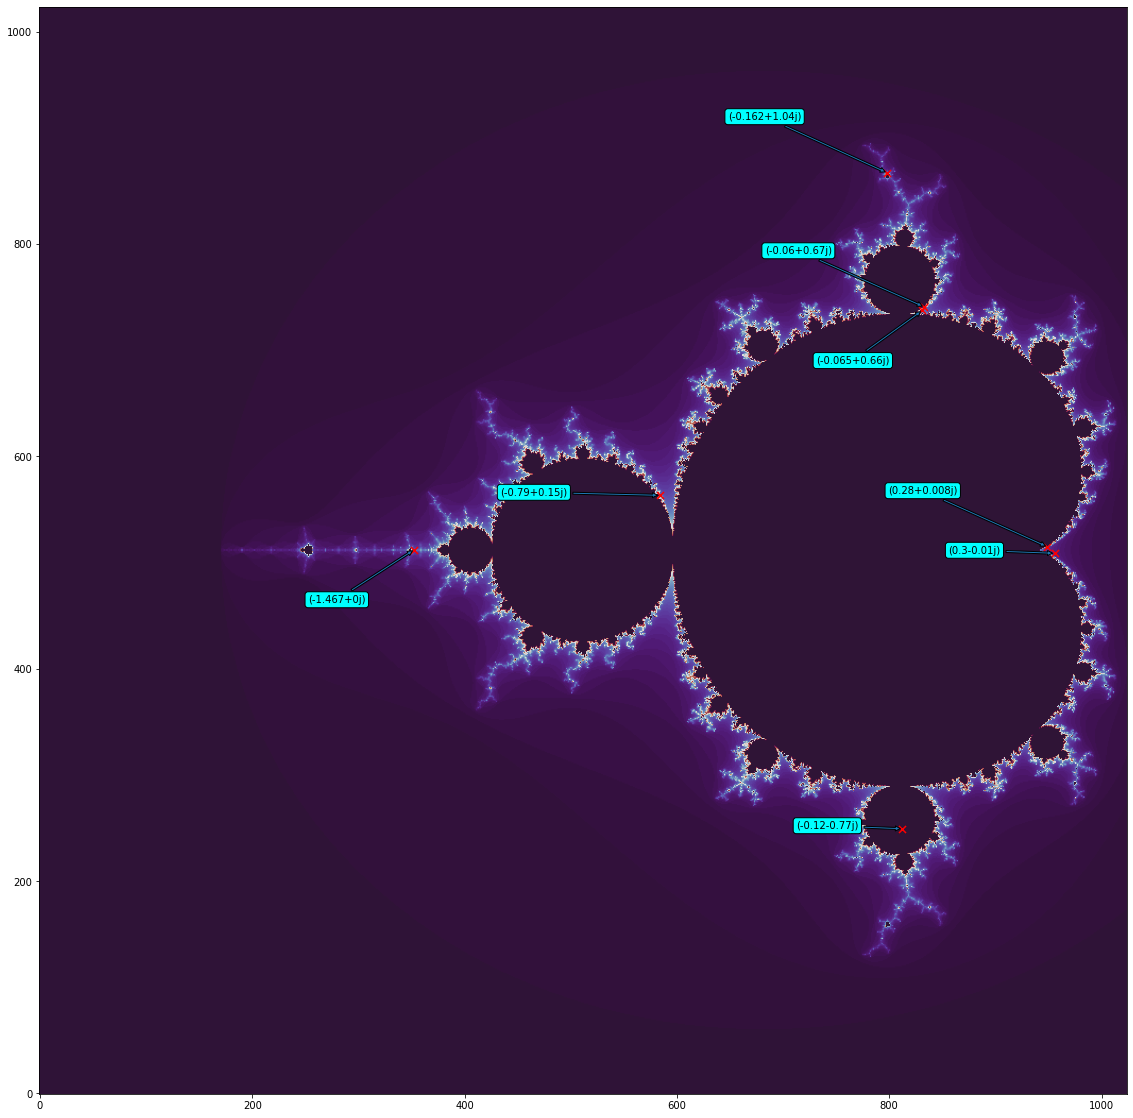

In [9]:
plt.figure(figsize=(20, 20))

# axes transformation
x = (complex_numbers.real+boundary[1].real+1)*resolution_steps/3
y = (complex_numbers.imag+boundary[1].imag)*resolution_steps/3

# scattering the Complex constants from before over the Mandelbrot image
plt.scatter(x, y, marker='x', s=50, c='r')
for i, c in enumerate(complex_numbers):
    r = np.random.randint(2,4) * 50
    plt.annotate(str(c), (x[i], y[i]), xytext=(x[i]-r, y[i]-np.random.randint(2,4) * 50 + r), bbox=dict(
        boxstyle="round",facecolor='cyan'), arrowprops=dict(arrowstyle="simple"))

plt.imshow(Mandel, cmap=cm.twilight_shifted, origin="lower")
plt.show()


## and that was the famous Mandelbrot with the previous $ c $ values plotted on top of it!

# More Links:

#### [NumPy / SciPy Recipes for Image Processing: Creating Fractal Images](https://www.researchgate.net/publication/272679245_NumPy_SciPy_Recipes_for_Image_Processing_Creating_Fractal_Images)
#### [Understanding Julia and Mandelbrot Sets](https://www.karlsims.com/julia.html)
#### [Efficiently generating the Mandelbrot and Julia sets](https://theses.liacs.nl/pdf/2018-2019-JonckheereLSde.pdf)
#### [How to Fold a Julia Fractal](https://acko.net/blog/how-to-fold-a-julia-fractal/)


# [Now click here and enjoy ;)](https://mandel.gart.nz/#/)
#### don't forget to check ***Show Julia Set!***